### Step 1: Read in Titanic.csv and observe a few samples, some features are categorical and others are numerical. Take a random 70% samples for training and the rest 30% for test.

### Import Required libraries

In [ ]:
!pip install pydotplus
!pip install dtreeviz

In [116]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import pydotplus
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import KFold

In [88]:
import os

In [91]:
import pandas as pd
hw3 = pd.read_csv('Titanic.csv')

In [92]:
hw3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1309 non-null   int64  
 1   pclass      1309 non-null   object 
 2   survived    1309 non-null   int64  
 3   name        1309 non-null   object 
 4   sex         1309 non-null   object 
 5   age         1046 non-null   float64
 6   sibsp       1309 non-null   int64  
 7   parch       1309 non-null   int64  
 8   ticket      1309 non-null   object 
 9   fare        1308 non-null   float64
 10  cabin       295 non-null    object 
 11  embarked    1307 non-null   object 
 12  boat        486 non-null    object 
 13  body        121 non-null    float64
 14  home.dest   745 non-null    object 
dtypes: float64(3), int64(4), object(8)
memory usage: 153.5+ KB


In [93]:

X = hw3[['pclass', 'sex', 'age', 'sibsp']]  # Match the order of features used during training
y = hw3['survived']



In [94]:
print(X.info())
print(X['pclass'].unique())
print(X['sex'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  1309 non-null   object 
 1   sex     1309 non-null   object 
 2   age     1046 non-null   float64
 3   sibsp   1309 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 41.0+ KB
None
['1st' '2nd' '3rd']
['female' 'male']


In the above data , Pclass and sex mentioned as object, we should change to 1st = 1,2nd = 2, 3rd = 3 and For sex, male =1
female =0

Before change the values, let's check is there null values present in the data

In [95]:
X.isna().sum()

pclass      0
sex         0
age       263
sibsp       0
dtype: int64

In 'age' column we can see that age have 263 null vales, Let's use mean of age for null replacement

In [96]:
X['age'].fillna((X['age'].mean()),inplace=True)

Let's check null values once

In [97]:
X

pclass     sex        age  sibsp
0       1st  female  29.000000      0
1       1st    male   0.916700      1
2       1st  female   2.000000      1
3       1st    male  30.000000      1
4       1st  female  25.000000      1
...     ...     ...        ...    ...
1304    3rd  female  14.500000      1
1305    3rd  female  29.881135      1
1306    3rd    male  26.500000      0
1307    3rd    male  27.000000      0
1308    3rd    male  29.000000      0

[1309 rows x 4 columns]

In [98]:
X.isna().sum()

pclass    0
sex       0
age       0
sibsp     0
dtype: int64

Now let's change the values of pclass and sex

In [99]:
X['pclass'] = X['pclass'].map({'1st':1,'2nd':2,'3rd':3})
X['sex'] = X['sex'].map({'male':0,'female':1})
X

pclass  sex        age  sibsp
0          1    1  29.000000      0
1          1    0   0.916700      1
2          1    1   2.000000      1
3          1    0  30.000000      1
4          1    1  25.000000      1
...      ...  ...        ...    ...
1304       3    1  14.500000      1
1305       3    1  29.881135      1
1306       3    0  26.500000      0
1307       3    0  27.000000      0
1308       3    0  29.000000      0

[1309 rows x 4 columns]

In [100]:
print(X.info())
print(X['pclass'].unique())
print(X['sex'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  1309 non-null   int64  
 1   sex     1309 non-null   int64  
 2   age     1309 non-null   float64
 3   sibsp   1309 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 41.0 KB
None
[1 2 3]
[1 0]


Preprocssing of the data is completed

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Step 2: Fit a decision tree model using independent variables ‘pclass + sex + age + sibsp’ and dependent variable ‘survived’. Plot the full tree. Make sure ‘survived’ is a qualitative variable taking 1 (yes) or 0 (no) in your code. You may see a tree similar to (not necessarily the exact same as) this one:

In [103]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [104]:
dtree = DecisionTreeClassifier()

dtree = dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

print("Classification Report: \n\n",classification_report(y_test, y_pred))

print("Accuracy: ",accuracy_score(y_test, y_pred))

Classification Report: 

               precision    recall  f1-score   support

           0       0.76      0.88      0.81       224
           1       0.80      0.62      0.70       169

    accuracy                           0.77       393
   macro avg       0.78      0.75      0.76       393
weighted avg       0.78      0.77      0.77       393

Accuracy:  0.7709923664122137


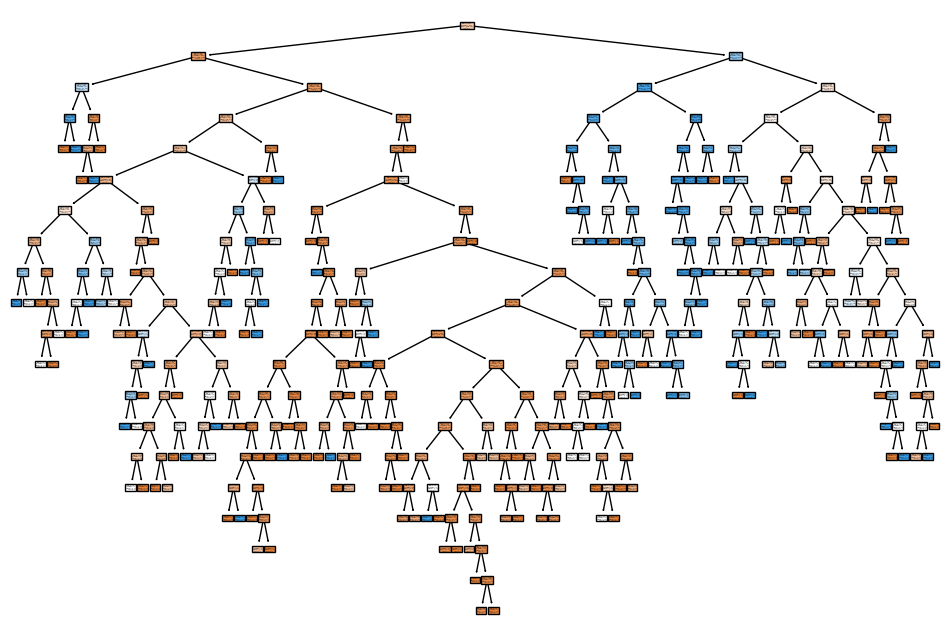

In [105]:
plt.figure(figsize=(12, 8))
plot_tree(dtree, feature_names=X.columns.tolist(), class_names=["0", "1"], filled=True)
plt.show()


The above picure is not clear, Let's do another way

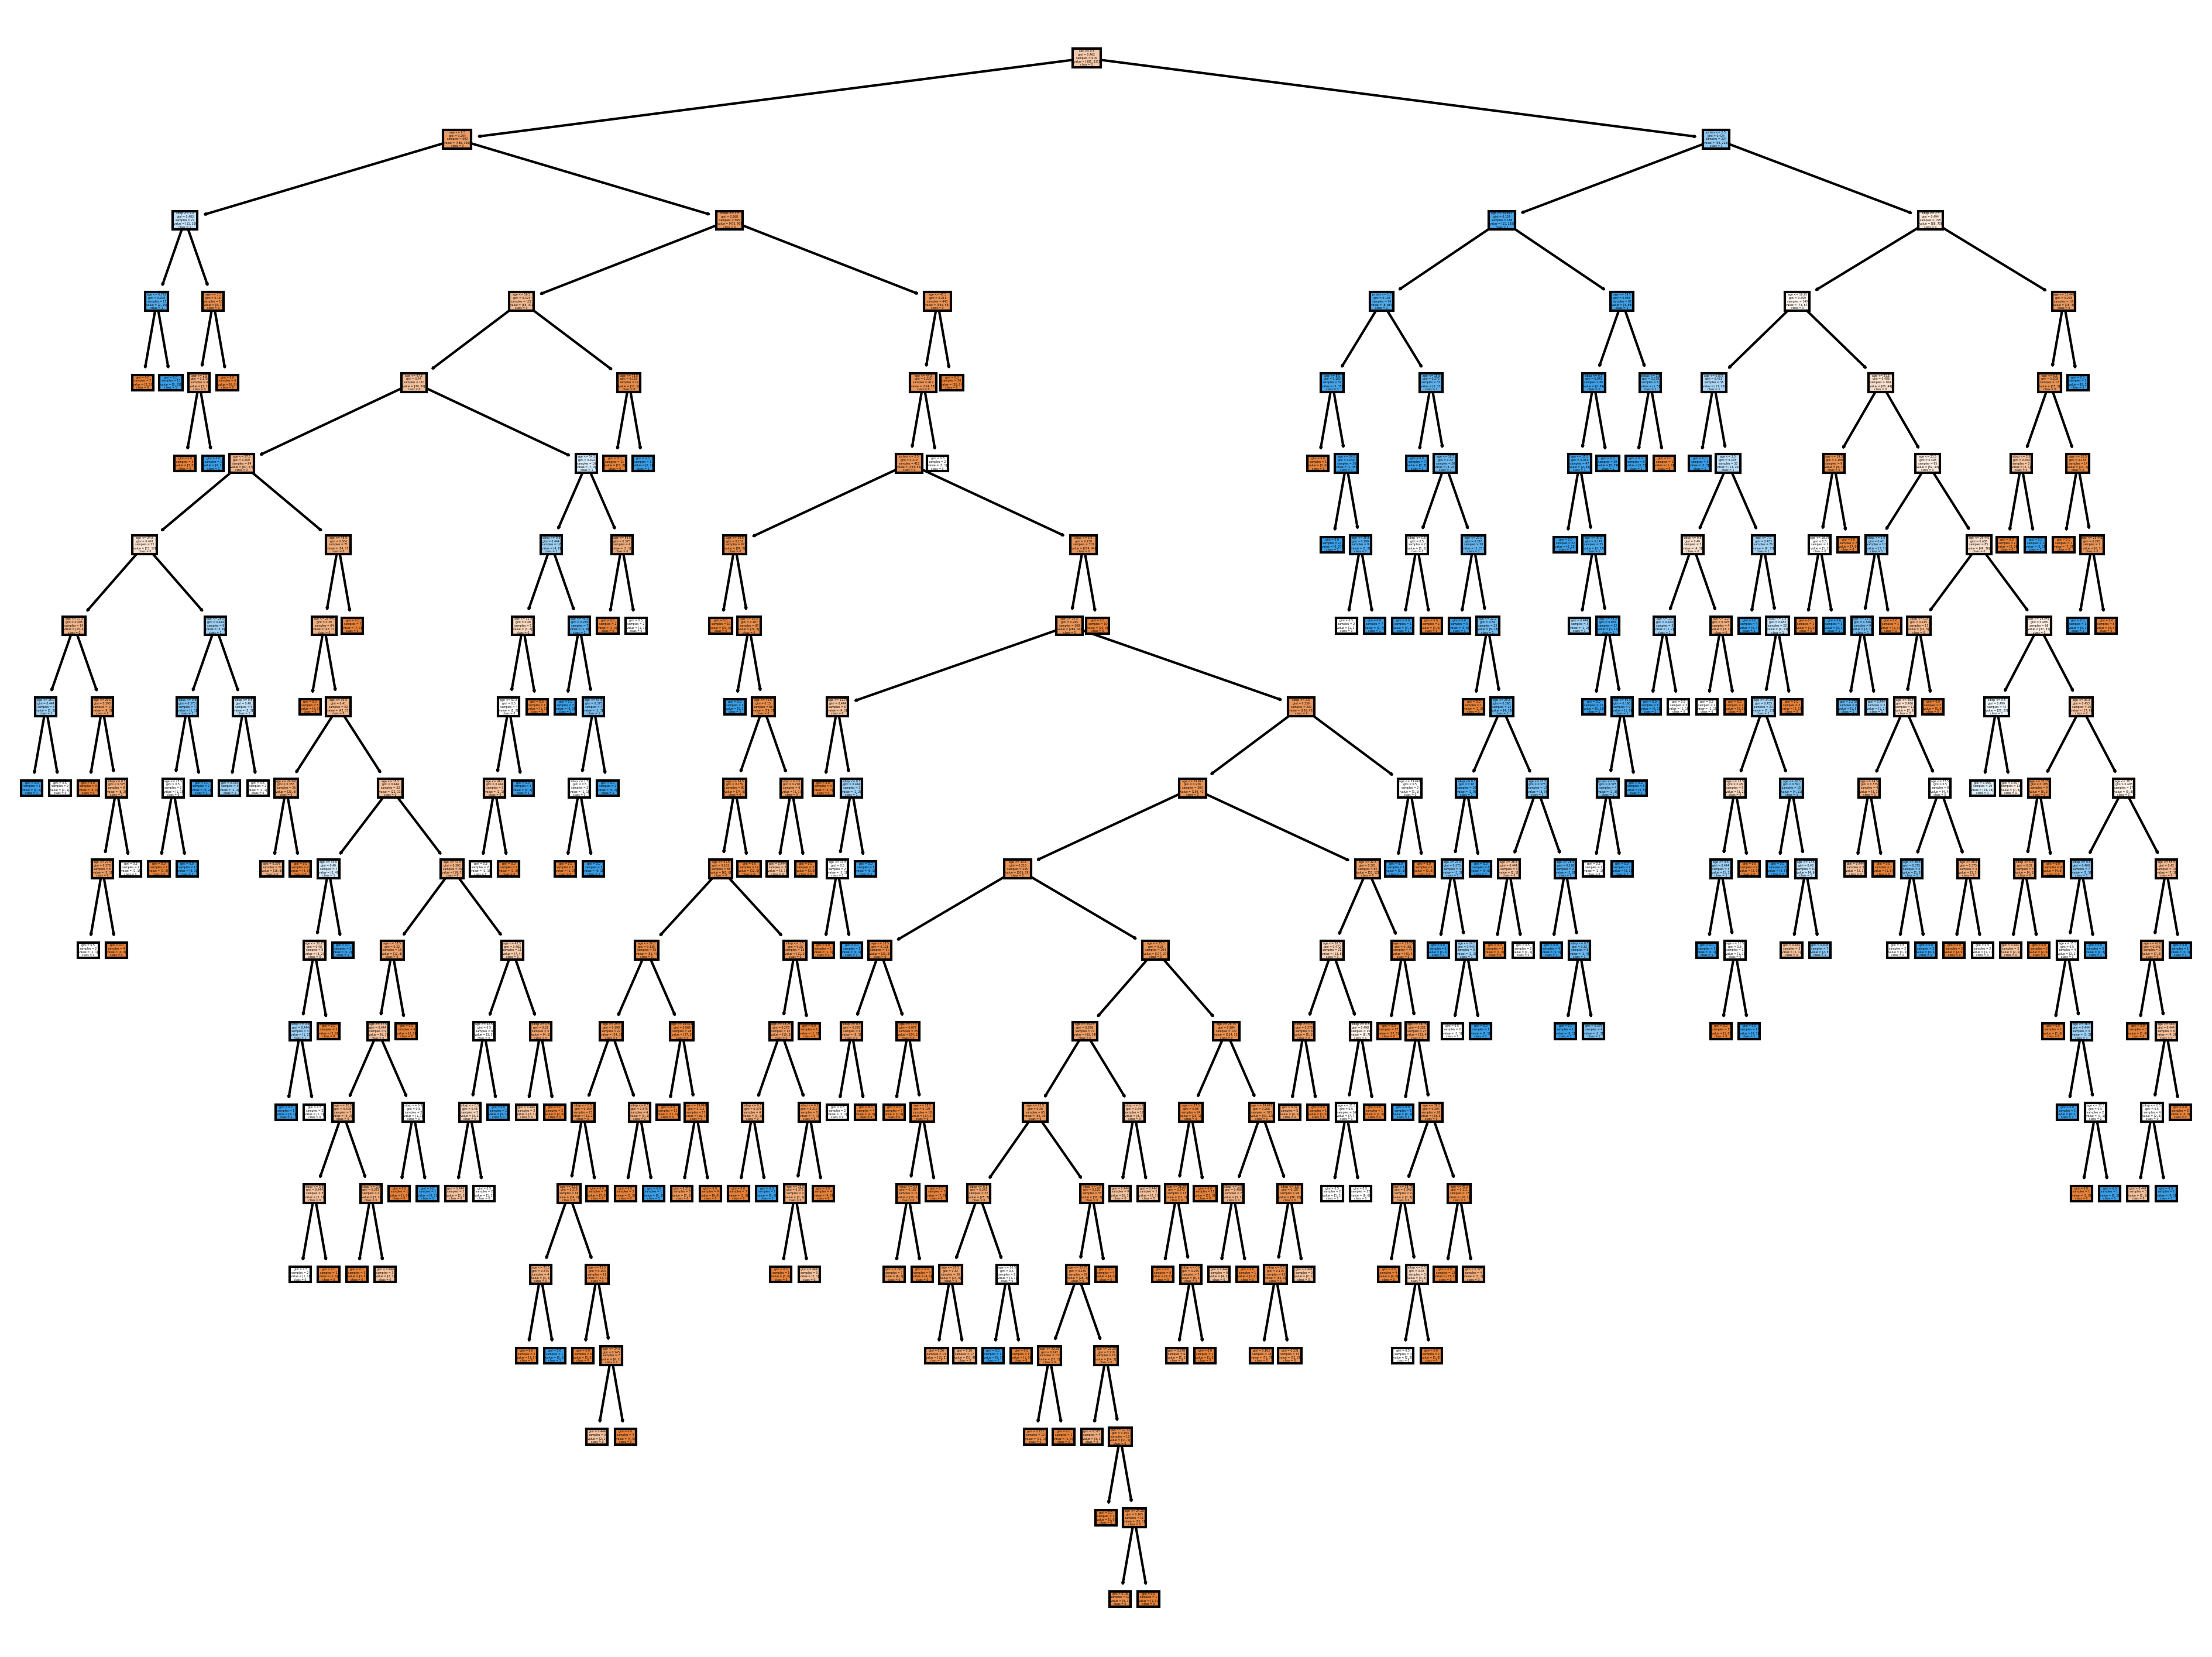

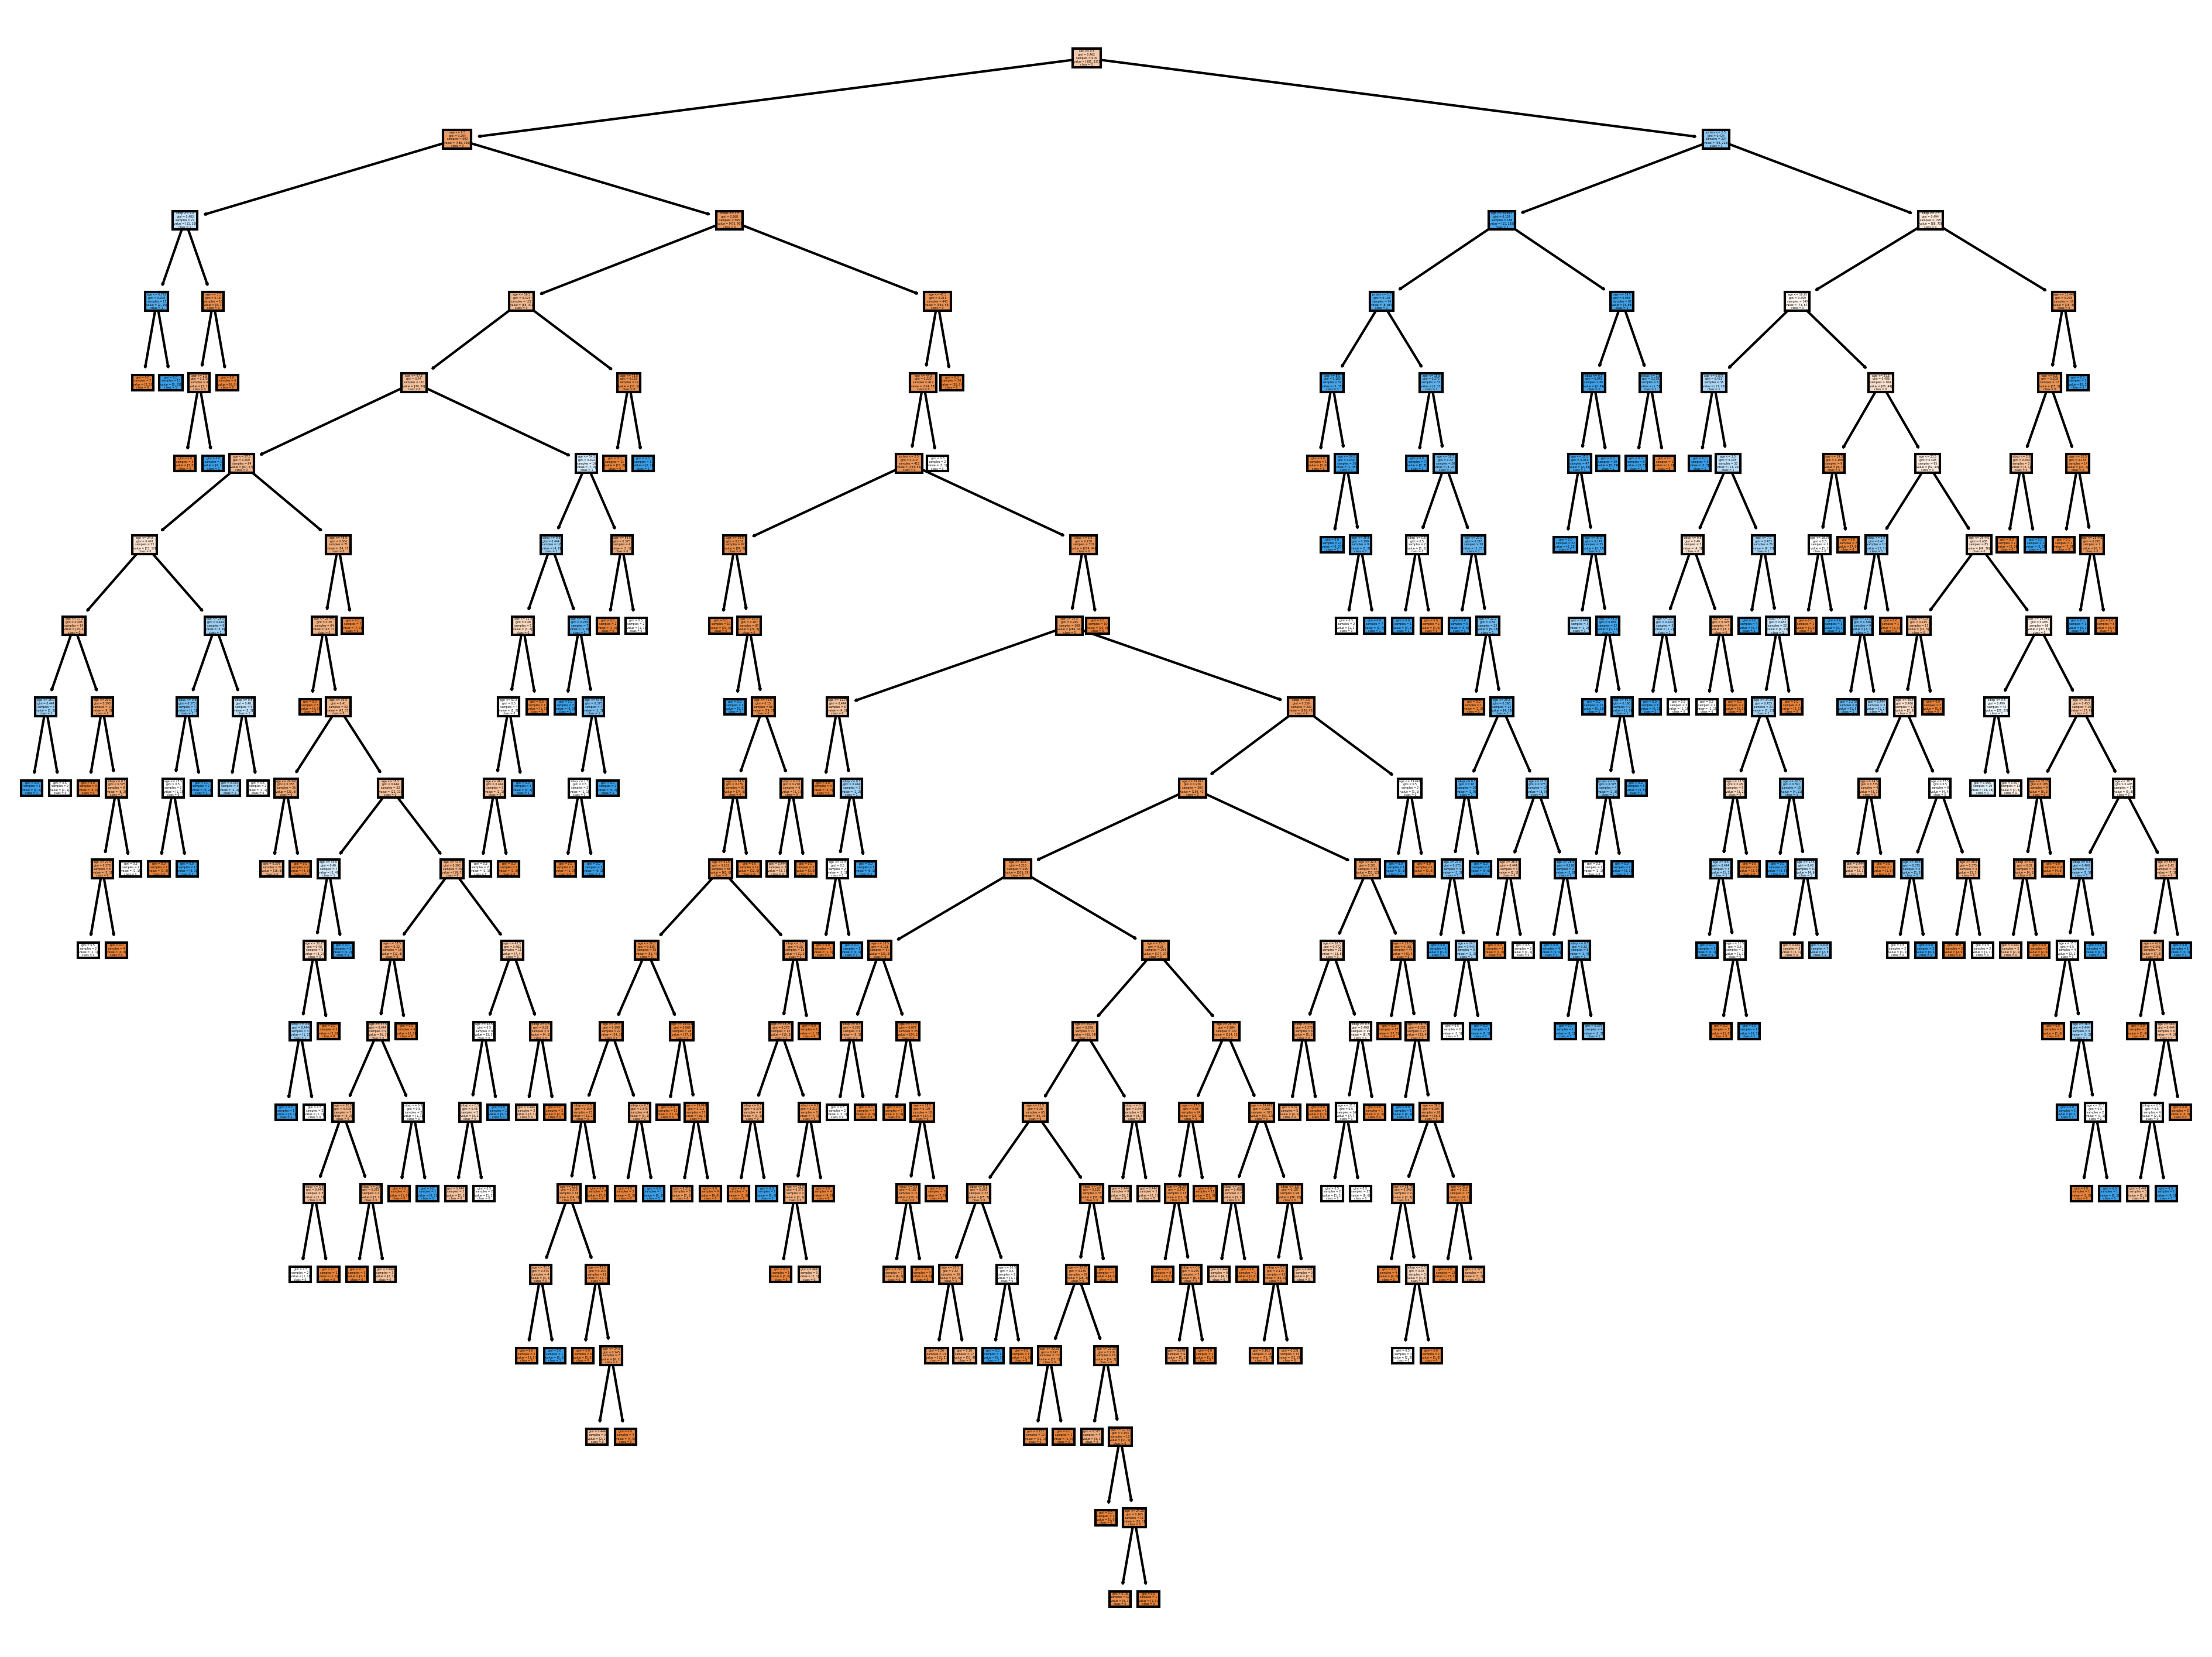

In [106]:
# Increase the figure size and DPI
plt.figure(figsize=(16, 12), dpi=300)  # Adjust the size and DPI as needed
plot_tree(dtree, feature_names=X.columns.tolist(), class_names=["0", "1"], filled=True)

# Save the figure as an image file (e.g., PNG)
plt.savefig('decision_tree.png', format='png', bbox_inches='tight')

# Display the image in the notebook
from IPython.display import Image
Image('decision_tree.png')


Here the below text shows the more information

In [107]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_1 <= 0.50
|   |--- feature_2 <= 9.50
|   |   |--- feature_3 <= 2.00
|   |   |   |--- feature_2 <= 0.79
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  0.79
|   |   |   |   |--- class: 1
|   |   |--- feature_3 >  2.00
|   |   |   |--- feature_2 <= 3.50
|   |   |   |   |--- feature_2 <= 2.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  2.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  3.50
|   |   |   |   |--- class: 0
|   |--- feature_2 >  9.50
|   |   |--- feature_0 <= 1.50
|   |   |   |--- feature_2 <= 56.50
|   |   |   |   |--- feature_2 <= 47.50
|   |   |   |   |   |--- feature_2 <= 27.50
|   |   |   |   |   |   |--- feature_2 <= 24.50
|   |   |   |   |   |   |   |--- feature_2 <= 17.50
|   |   |   |   |   |   |   |   |--- feature_2 <= 15.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_2 >  15.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   | 

In [108]:
from dtreeviz.trees import model

viz = model(dtree, X_train, y_train, target_name='survived', feature_names=X.columns.tolist(), class_names=["0", "1"])
viz.view()

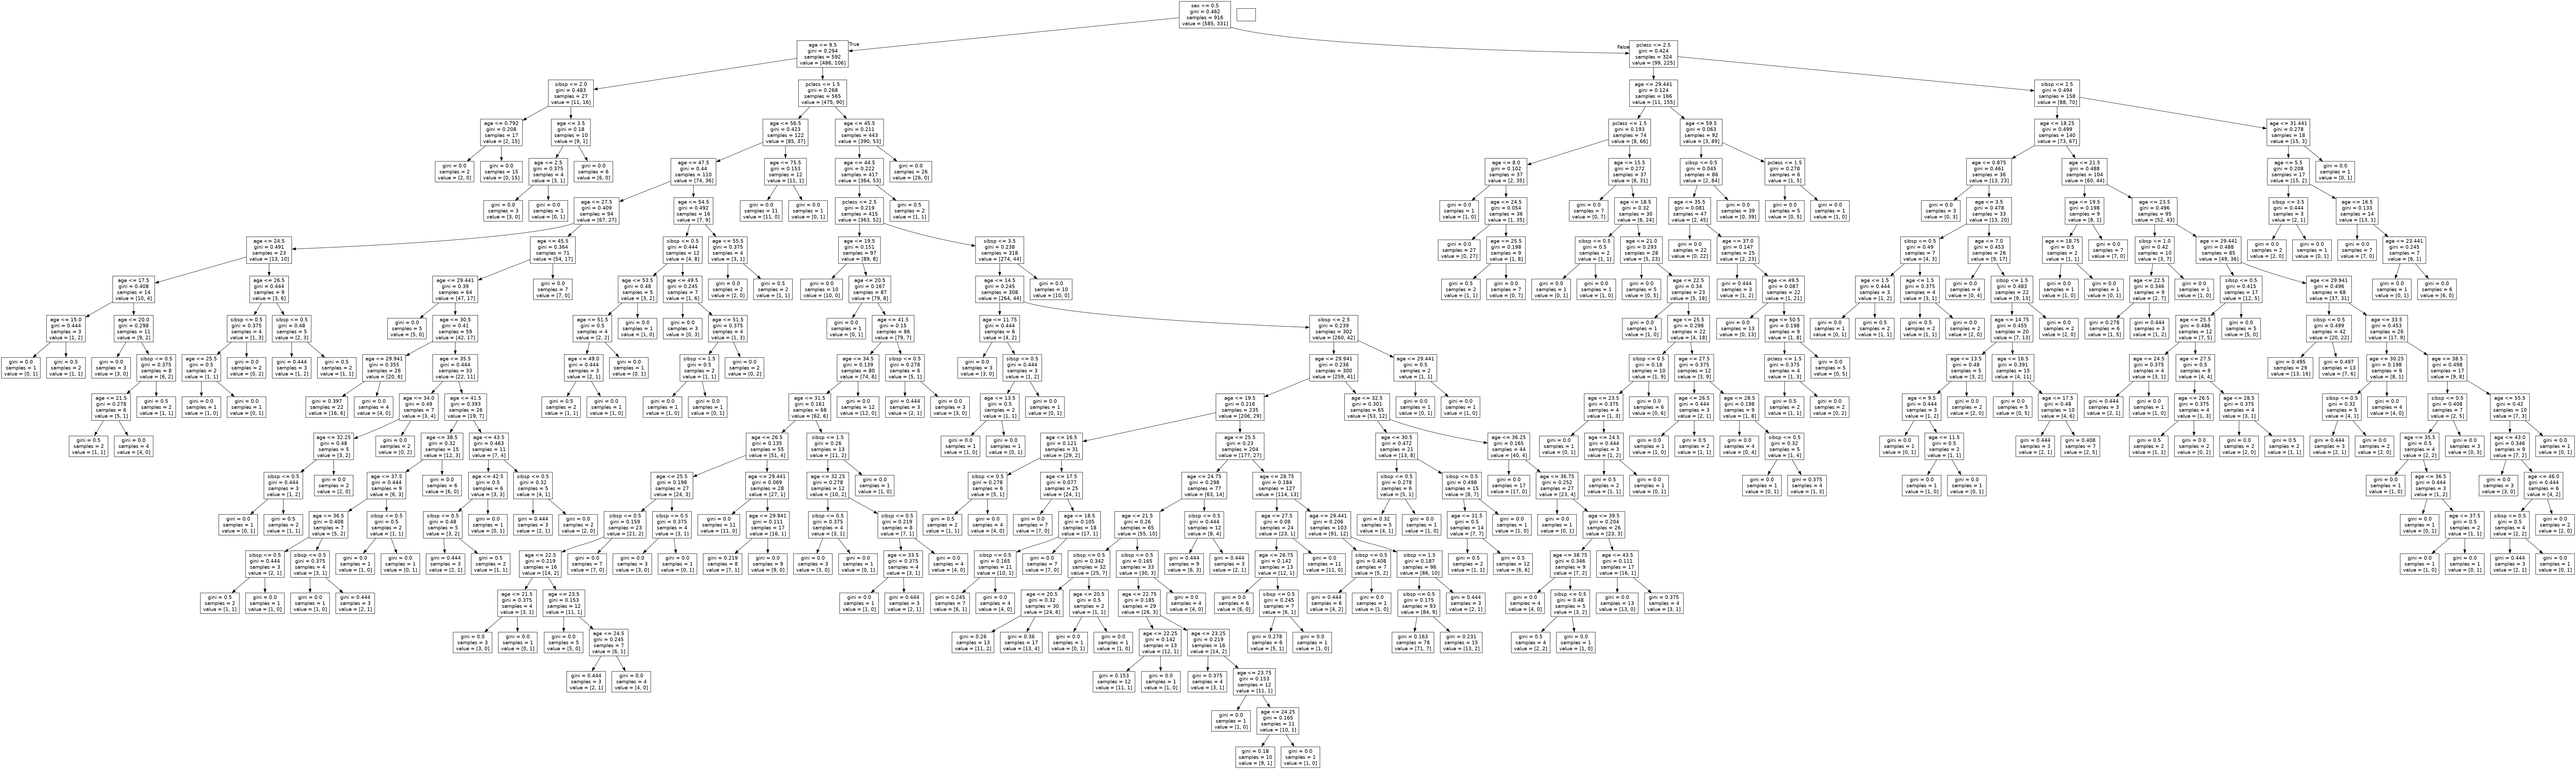

In [109]:
#Plotting Decision Tree
data = export_graphviz(dtree, out_file=None,feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(data)
Image(graph.create_png())

### Step 3: Use cross‐validation to find the best parameter to prune the tree. You should be able to plot a graph with the ‘tree size’ as the x-axis and ‘number of misclassification’ as the Y-axis. You may have a plot similar to (not necessarily the exact same as) below:

In [110]:
from sklearn.metrics import confusion_matrix
y_pred_new = dtree.predict(X_train)
# For training set
conf_matrix_train = confusion_matrix(y_train, y_pred_new)
TN_train, FN_train, TP_train, FP_train = conf_matrix_train.ravel()
sensitivity_train = TP_train / (TP_train + FN_train)
specificity_train = TN_train / (TN_train + FP_train)

# For testing set
conf_matrix_test = confusion_matrix(y_test, y_pred)
TN_test, FN_test, TP_test, FP_test = conf_matrix_test.ravel()
sensitivity_test = TP_test / (TP_test + FN_test)
specificity_test = TN_test / (TN_test + FP_test)

print("In-sample percent survivors correctly predicted (on training set): {0:.2f}%".format(sensitivity_train * 100))
print("In-sample percent fatalities correctly predicted (on training set): {0:.2f}%".format(specificity_train * 100))
print("Out-of-sample percent survivors correctly predicted (on testing set): {0:.2f}%".format(sensitivity_test * 100))
print("Out-of-sample percent fatalities correctly predicted (on testing set): {0:.2f}%".format(specificity_test * 100))


In-sample percent survivors correctly predicted (on training set): 80.00%
In-sample percent fatalities correctly predicted (on training set): 69.24%
Out-of-sample percent survivors correctly predicted (on testing set): 71.11%
Out-of-sample percent fatalities correctly predicted (on testing set): 65.35%


In [111]:
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Ignore warnings
warnings.filterwarnings("ignore")

# Define the hyperparameters to tune
tuned_parameters = {
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
}

# Create a Decision Tree classifier
clf = DecisionTreeClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=tuned_parameters,
    scoring='accuracy',
    cv=10,
    n_jobs=-1
)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters set found on the development set:")
print(grid_search.best_params_)
print()

# Print grid scores
print("Grid scores on the development set:")
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

# Print detailed classification report on the testing set
print()
print("Detailed classification report on the testing set:")
y_true, y_pred = y_test, grid_search.predict(X_test)
print(classification_report(y_true, y_pred))


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best parameters set found on the development set:
{'criterion': 'gini', 'max_leaf_nodes': 6}

Grid scores on the development set:
0.776 (+/-0.100) for {'criterion': 'gini', 'max_leaf_nodes': 2}
0.796 (+/-0.057) for {'criterion': 'gini', 'max_leaf_nodes': 3}
0.799 (+/-0.051) for {'criterion': 'gini', 'max_leaf_nodes': 4}
0.807 (+/-0.060) for {'criterion': 'gini', 'max_leaf_nodes': 5}
0.808 (+/-0.060) for {'criterion': 'gini', 'max_leaf_nodes': 6}
0.808 (+/-0.060) for {'criterion': 'gini', 'max_leaf_nodes': 7}
0.807 (+/-0.060) for {'criterion': 'gini', 'max_leaf_nodes': 8}
0.803 (+/-0.061) for {'criterion': 'gini', 'max_leaf_nodes': 9}
0.801 (+/-0.065) for {'criterion': 'gini', 'max_leaf_nodes': 10}
0.799 (+/-0.077) for {'criterion': 'gini', 'max_leaf_nodes': 11}
0.776 (+/-0.100) for {'criterion': 'entropy', 'max_leaf_nodes': 2}
0.796 (+/-0.057) for {'criterion': 'entropy', 'max_leaf_nodes': 3}
0.798 (+/-0.051) for {'criterion': 'entropy', 'max_leaf_nodes': 4}
0.798 (+/-0.051) for {'crit

## With out kfold cross validation 

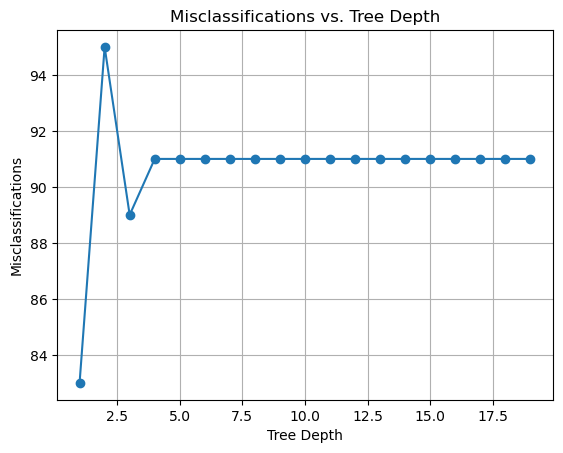

In [112]:
misclassification = []
depths = range(1, 20)

for depth in depths:
    dtree = DecisionTreeClassifier(max_depth=depth, max_leaf_nodes=8, min_samples_split=9)
    dtree = dtree.fit(X_train, y_train)
    y_pred = dtree.predict(X_test)
    
    # Calculate misclassifications
    misclassified = np.where(y_test != y_pred)
    num_misclassifications = len(misclassified[0])
    
    misclassification.append(num_misclassifications)

plt.plot(depths, misclassification,marker = 'o')
plt.xlabel('Tree Depth')
plt.ylabel('Misclassifications')
plt.title('Misclassifications vs. Tree Depth')
plt.grid(True)
plt.show()

## With K fold Cross validation

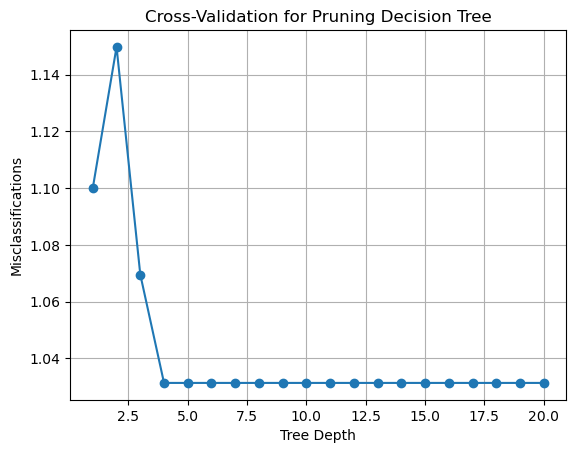

In [113]:
X = np.array(X)
y = np.array(y)

# Define a range of tree depths to test
depths = range(1, 21)
misclassification_rates = []

# Number of folds for cross-validation
k_folds = 5
kf = KFold(n_splits=k_folds)

for depth in depths:
    misclassifications = 0

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Create and fit a decision tree with the current depth
        dtree = DecisionTreeClassifier(max_depth=depth, max_leaf_nodes=8, min_samples_split=9)
        dtree.fit(X_train, y_train)

        # Predict and calculate misclassifications
        y_pred = dtree.predict(X_test)
        misclassified = np.where(y_test != y_pred)
        num_misclassifications = len(misclassified[0])
        misclassifications += num_misclassifications

    # Calculate the average misclassification rate for this tree depth
    avg_misclassification_rate = misclassifications / (len(X) / k_folds)
    misclassification_rates.append(avg_misclassification_rate)

# Plot the graph
plt.plot(depths, misclassification_rates, marker='o')
plt.title('Cross-Validation for Pruning Decision Tree')
plt.xlabel('Tree Depth')
plt.ylabel('Misclassifications')
plt.grid(True)
plt.show()


## Step 4: Find the tree size that yields a minimum number of misclassifications. Choose the optimal tree size to prune the tree and plot the pruned tree (which shall be smaller than the tree you obtained in Step 2). Report the accuracy of pruned tree on the test set for the following: percent survivors correctly predicted (on test set) percent fatalities correctly predicted (on test set)

In [117]:
# Find the tree size that yields the minimum number of misclassifications
optimal_tree_size = tree_sizes[np.argmin(misclassification_rates)]
print("Optimal Tree Size:", optimal_tree_size)

# Prune the tree with the optimal size
pruned_tree = DecisionTreeClassifier(max_depth=optimal_tree_size)
pruned_tree.fit(X_train, y_train)


Optimal Tree Size: 4


DecisionTreeClassifier(max_depth=4)

In [119]:
print("Optimal Tree Size:", optimal_tree_size)
# Predict on the test set using the pruned tree
y_pred = pruned_tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the percentage of survivors and fatalities correctly predicted
total_survivors = np.sum(y_test == 1)
total_fatalities = np.sum(y_test == 0)

correctly_predicted_survivors = conf_matrix[1, 1]
correctly_predicted_fatalities = conf_matrix[0, 0]

percent_survivors_correctly_predicted = (correctly_predicted_survivors / total_survivors) * 100
percent_fatalities_correctly_predicted = (correctly_predicted_fatalities / total_fatalities) * 100

print("Percent survivors correctly predicted:", percent_survivors_correctly_predicted, "%")
print("Percent fatalities correctly predicted:", percent_fatalities_correctly_predicted, "%")


Optimal Tree Size: 4
Accuracy on the test set: 0.7586206896551724
Percent survivors correctly predicted: 62.96296296296296 %
Percent fatalities correctly predicted: 79.22705314009661 %


In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Create a Random Forest Classifier with 50 trees and the optimal tree size
random_forest = RandomForestClassifier(n_estimators=50, max_depth=optimal_tree_size, random_state=42)

# Train the Random Forest on the training data
random_forest.fit(X_train, y_train)

# Predict on the test set using the Random Forest
y_pred_rf = random_forest.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest on the test set:", accuracy_rf)

# Calculate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Calculate the percentage of survivors and fatalities correctly predicted
total_survivors = np.sum(y_test == 1)
total_fatalities = np.sum(y_test == 0)

correctly_predicted_survivors_rf = conf_matrix_rf[1, 1]
correctly_predicted_fatalities_rf = conf_matrix_rf[0, 0]

percent_survivors_correctly_predicted_rf = (correctly_predicted_survivors_rf / total_survivors) * 100
percent_fatalities_correctly_predicted_rf = (correctly_predicted_fatalities_rf / total_fatalities) * 100

print("Percent survivors correctly predicted by Random Forest:", percent_survivors_correctly_predicted_rf, "%")
print("Percent fatalities correctly predicted by Random Forest:", percent_fatalities_correctly_predicted_rf, "%")


Accuracy of Random Forest on the test set: 0.7931034482758621
Percent survivors correctly predicted by Random Forest: 59.25925925925925 %
Percent fatalities correctly predicted by Random Forest: 84.54106280193237 %


In my comparison:

- **Random Forest** has a higher overall accuracy (0.7931) compared to a single decision tree (0.7586).
- **Random Forest** correctly predicts fatalities at a higher rate (84.54%) compared to the single decision tree (79.23%).
- However, the single decision tree predicts survivors better (62.96%) than the Random Forest (59.26%).

The improvement in overall accuracy can be attributed to the Random Forest's ability to capture more complex patterns and reduce overfitting. The Random Forest may not predict survivors as well due to factors like data imbalance and randomness in the ensemble. To further improve, you can experiment with hyperparameters and consider the data's characteristics.